In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [10]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

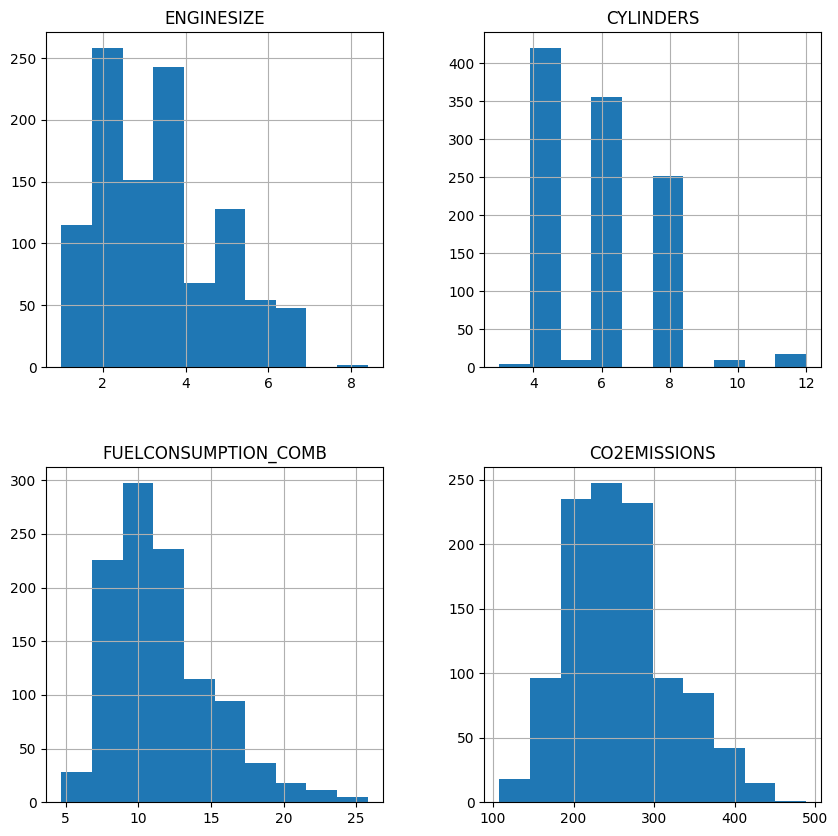

In [15]:
data.hist(figsize=(10,10))

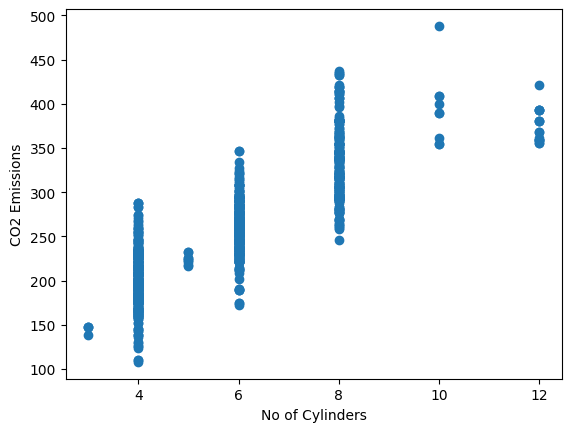

In [17]:
plt.scatter(data['CYLINDERS'], data.CO2EMISSIONS)
plt.xlabel('No of Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

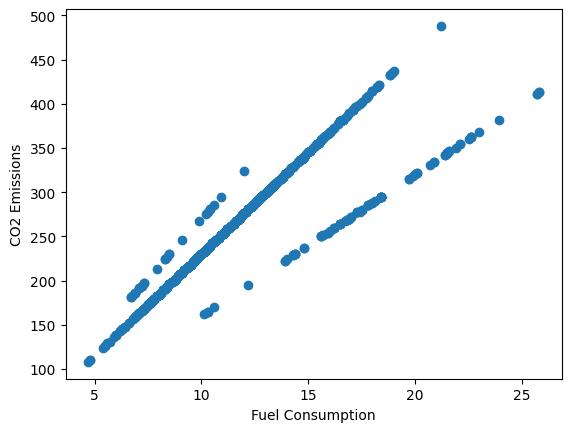

In [20]:
plt.scatter(data['FUELCONSUMPTION_COMB'], data.CO2EMISSIONS)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

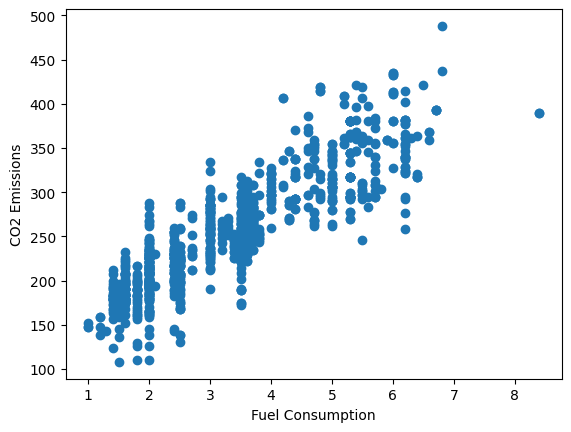

In [22]:
plt.scatter(data['ENGINESIZE'], data.CO2EMISSIONS)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

In [24]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

print("Training Data: ", train.shape)
print("Testing Data: ", test.shape)
print("Total Data: ", data.shape)

Training Data:  (853, 4)
Testing Data:  (214, 4)
Total Data:  (1067, 4)


In [26]:
Emission = data['CO2EMISSIONS']

sum_emission = Emission.sum()
num_cars = len(Emission)
avg_emission1 = sum_emission/num_cars
avg_emission2 = Emission.mean()
print(avg_emission1)
print(avg_emission2)

256.2286785379569
256.2286785379569


In [27]:
def simple_linear_regression(input_feature, output):
    Xi = input_feature
    Yi = output
    N = len(Xi)

    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()

    S_XiYi = (Xi * Yi).sum()
    S_XiXi = (Xi * Xi).sum()

    slope = (N * S_XiYi - (Xi.sum() * Yi.sum())) / (N * S_XiXi - (Xi.sum() * Xi.sum()))

    intercept = Yi_mean - slope * Xi_mean

    return (intercept, slope)

In [28]:
co2_intercept, co2_slope = simple_linear_regression(train['ENGINESIZE'], train['CO2EMISSIONS'])

print("Intercept: ", co2_intercept)
print("Slope: ", co2_slope)

Intercept:  127.16989950881938
Slope:  38.79512383605654


In [29]:
#Equation of line

print("Y = ", co2_slope, "*X + ", co2_intercept)

Y =  38.79512383605654 *X +  127.16989950881938


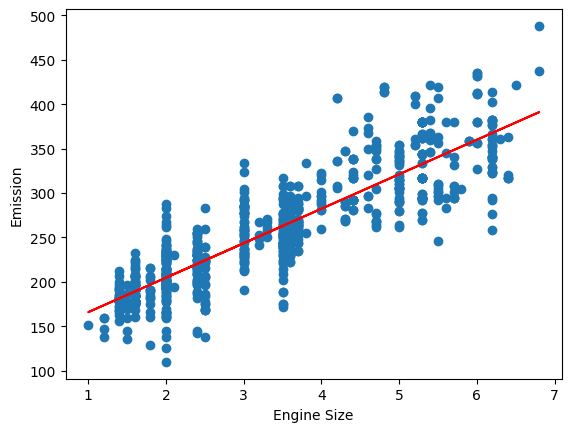

In [43]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'])
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.plot(train['ENGINESIZE'], co2_slope * train['ENGINESIZE'] + co2_intercept, '-r')


In [44]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = intercept + slope * input_feature
    return predicted_values

In [46]:
my_engine_size = 3.5

estimated_emission = get_regression_predictions(my_engine_size, co2_intercept, co2_slope)
print("Estimated Emission: ", estimated_emission)

Estimated Emission:  262.9528329350173


In [47]:
#predicting Engine Size from Emission

def inverse_regression_predictions(output, intercept, slope):
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [49]:
co2_emission = 250

estimated_engine_size = inverse_regression_predictions(co2_emission, co2_intercept, co2_slope)
print("Estimated Engine Size: ", estimated_engine_size)

Estimated Engine Size:  3.1661221397370873


In [50]:
#calcuting the error in prediction

def residual_sum_of_squares(input_feature, output, intercept, slope):
    prediction = input_feature * slope + intercept

    residual = output - prediction

    RSS = (residual*residual).sum()

    return RSS

In [52]:
print(residual_sum_of_squares(test['ENGINESIZE'], test['CO2EMISSIONS'], co2_intercept, co2_slope))

159741.10295932175


In [53]:
print(residual_sum_of_squares(train['ENGINESIZE'], train['CO2EMISSIONS'], co2_intercept, co2_slope))

850827.1822780487
